In [1]:

import pandas as pd
from pandas import Series,DataFrame
! pip install seaborn
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime, timedelta
import datetime


In [32]:
# get airbnb & test csv files as a DataFrame
airbnb_df  = pd.read_csv('./data/train_users_2.csv')
test_df    = pd.read_csv('./data/test_users.csv')
airbnb_df['train_test'] = 'train'
test_df['train_test'] = 'test'
# preview the data
joined_df = pd.concat([airbnb_df, test_df], ignore_index = True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


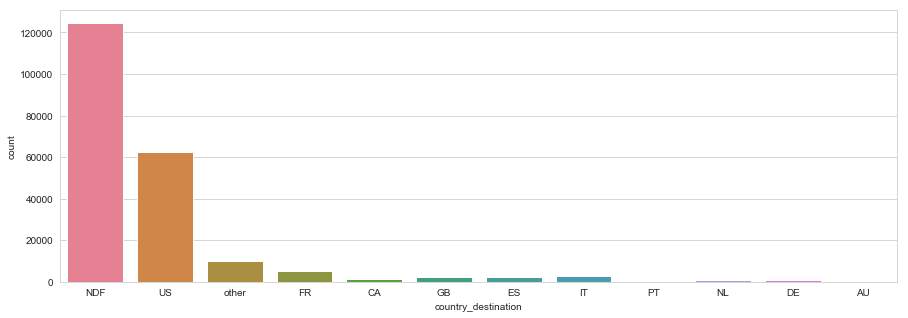

In [3]:


joined_df['booked'] = (joined_df['country_destination'] != 'NDF').astype(int)
# test_df['booked']   = (test_df['country_destination'] != 'NDF').astype(int)

# Plot the frequency for every country_destination value
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=airbnb_df, palette="husl", ax=axis1)

In [31]:
joined_df["country_destination"].info

AttributeError: 'Series' object has no attribute 'count_values'

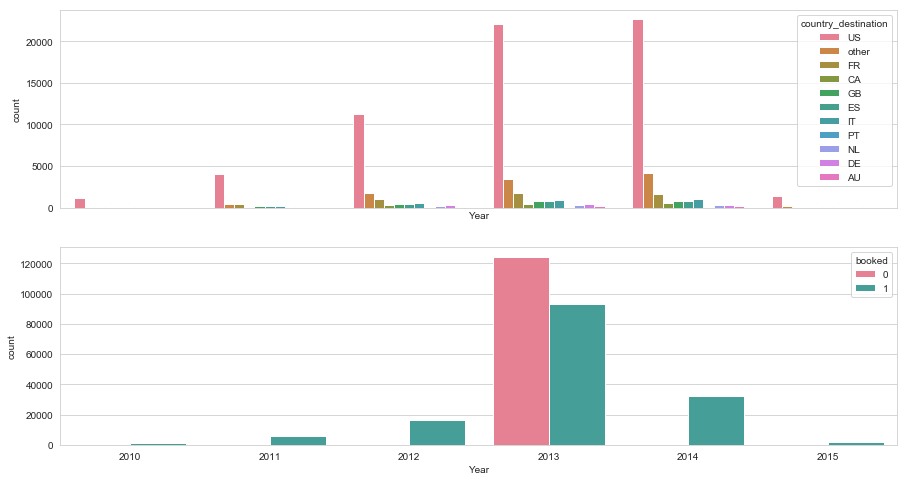

In [4]:
def get_year(date):
    if date == date: 
        return int(str(date)[:4])
    return date

def get_month(date):
    if date == date: 
        return int(str(date)[5:7])
    return date

# Create Year and Month columns
joined_df['Year']  = joined_df['date_first_booking'].apply(get_year)
joined_df['Month'] = joined_df['date_first_booking'].apply(get_month)


# fill NaN
joined_df['Year'].fillna(joined_df['Year'].median(), inplace=True)
joined_df['Month'].fillna(joined_df['Month'].median(), inplace=True)


# convert type to integer
joined_df[['Year', 'Month']] = joined_df[['Year', 'Month']].astype(int)


# Plot
fig, (axis1, axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# frequency of country_destination for every year
sns.countplot(x="Year",hue="country_destination", data=joined_df[joined_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)

# frequency of booked Vs no-booking users for every year
# NOTICE that in year 2014, and 2015 there wasn't "no-booking"
sns.countplot(x="Year",hue="booked", data=joined_df, palette="husl", order=[2010,2011,2012,2013,2014,2015], ax=axis2)

# drop columns
joined_df.drop(['date_first_booking','Month'], axis=1, inplace=True)

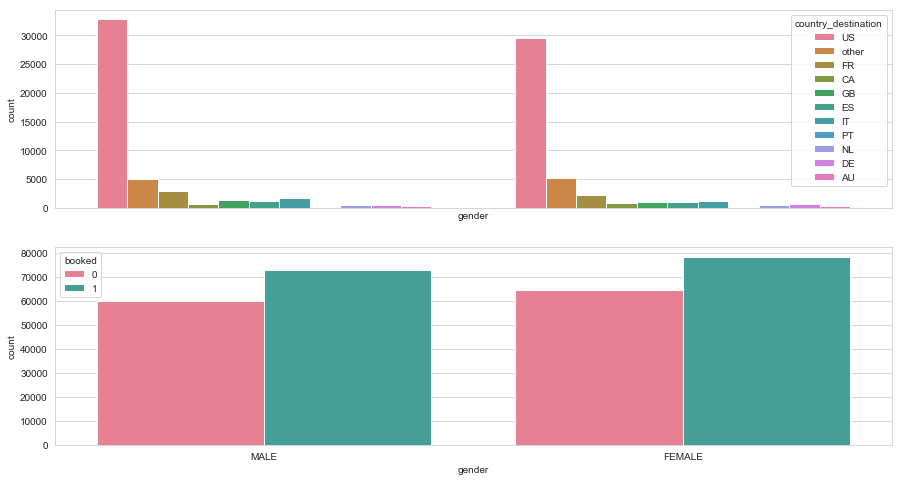

In [5]:
# gender

i = 0
def get_gender(gender):
    global i
    if gender != 'FEMALE' and gender != 'MALE':
        return 'FEMALE' if(i % 2) else 'MALE'
    i = i + 1
    return gender

# replace all values other than 'FEMALE' and 'MALE'
joined_df['gender'] = joined_df['gender'].apply(get_gender)


# Plot
fig, (axis1, axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# frequency of country_destination for every gender
sns.countplot(x="gender",hue="country_destination", data=joined_df[joined_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)

# frequency of booked Vs no-booking users for every gender
sns.countplot(x="gender",hue="booked", data=joined_df, palette="husl", ax=axis2)

# Map gender values to 1s and 0s
joined_df["gender"] = joined_df["gender"].map({"FEMALE": 1, "MALE": 0})


# drop columns
#joined_df.drop(['gender'], axis=1,inplace=True)


In [6]:
# age

# assign all age values > 100 to NaN, these NaN values will be replaced with real ages below
joined_df["age"][joined_df["age"] > 95] = np.NaN
joined_df["age"][joined_df["age"] < 14] = np.NaN
# get average, std, and number of NaN values in airbnb_df
average_age_airbnb   = joined_df["age"].mean()
std_age_airbnb       = joined_df["age"].std()
count_nan_age_airbnb = joined_df["age"].isnull().sum()


# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_airbnb - std_age_airbnb, average_age_airbnb + std_age_airbnb, size = count_nan_age_airbnb)


# fill NaN values in Age column with random values generated
joined_df["age"][np.isnan(joined_df["age"])] = rand_1


# convert type to integer
joined_df['age'] = joined_df['age'].astype(int)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
joined_df['age']

0         30
1         38
2         56
3         42
4         41
5         30
6         46
7         47
8         50
9         46
10        36
11        47
12        39
13        37
14        36
15        33
16        35
17        31
18        43
19        29
20        32
21        30
22        40
23        31
24        40
25        26
26        40
27        32
28        35
29        37
          ..
275517    33
275518    48
275519    40
275520    24
275521    32
275522    35
275523    34
275524    29
275525    33
275526    40
275527    39
275528    27
275529    25
275530    44
275531    39
275532    34
275533    30
275534    40
275535    27
275536    24
275537    43
275538    55
275539    34
275540    32
275541    39
275542    31
275543    28
275544    37
275545    42
275546    49
Name: age, Length: 275547, dtype: int32

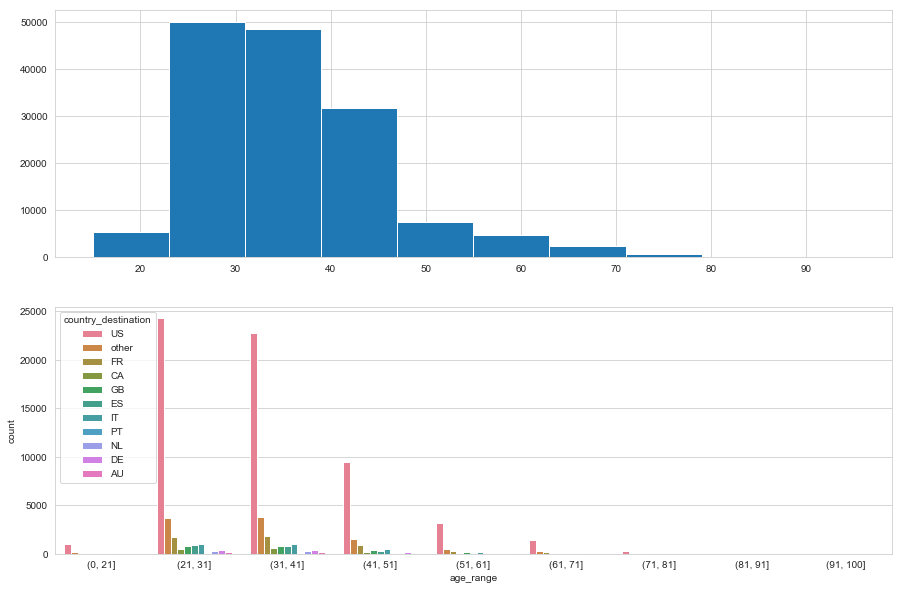

In [8]:
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(15,10))

# frequency for age values(in case there was a booking)
joined_df['age'][joined_df['country_destination'] != 'NDF'].hist(ax=axis1)

# cut age values into ranges 
joined_df['age_range'] = pd.cut(joined_df["age"], [0, 21, 31, 41, 51, 61, 71, 81, 91, 100])

# frequency of country_destination for every age range
sns.countplot(x="age_range",hue="country_destination", data=joined_df[joined_df['country_destination'] != 'NDF'], palette="husl", ax=axis2)


# # drop columns
joined_df.drop(['age'], axis=1,inplace=True)



In [9]:
joined_df

,affiliate_channel,affiliate_provider,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,id,language,signup_app,signup_flow,signup_method,timestamp_first_active,train_test,booked,Year,age_range
0,direct,direct,NDF,2010-06-28,untracked,Chrome,Mac Desktop,gxn3p5htnn,en,Web,0,facebook,20090319043255,train,0,2013,"(21, 31]"
1,seo,google,NDF,2011-05-25,untracked,Chrome,Mac Desktop,820tgsjxq7,en,Web,0,facebook,20090523174809,train,0,2013,"(31, 41]"
2,direct,direct,US,2010-09-28,untracked,IE,Windows Desktop,4ft3gnwmtx,en,Web,3,basic,20090609231247,train,1,2010,"(51, 61]"
3,direct,direct,other,2011-12-05,untracked,Firefox,Mac Desktop,bjjt8pjhuk,en,Web,0,facebook,20091031060129,train,1,2012,"(41, 51]"
4,direct,direct,US,2010-09-14,untracked,Chrome,Mac Desktop,87mebub9p4,en,Web,0,basic,20091208061105,train,1,2010,"(31, 41]"
5,other,other,US,2010-01-01,omg,Chrome,Mac Desktop,osr2jwljor,en,Web,0,basic,20100101215619,train,1,2010,"(21, 31]"
6,other,craigslist,US,2010-01-02,untracked,Safari,Mac Desktop,lsw9q7uk0j,en,Web,0,basic,20100102012558,train,1,2010,"(41, 51]"
7,direct,direct,US,2010-01-03,omg,Safari,Mac Desktop,0d01nltbrs,en,Web,0,basic,20100103191905,train,1,2010,"(41, 51]"
8,other,craigslist,US,2010-01-04,untracked,Safari,Mac Desktop,a1vcnhxeij,en,Web,0,basic,20100104004211,train,1,2010,"(41, 51]"
9,other,craigslist,US,2010-01-04,omg,Firefox,Mac Desktop,6uh8zyj2gn,en,Web,0,basic,20100104023758,train,1,2010,"(41, 51]"


In [10]:
count_first_affiliate = 7    # len(np.unique(airbnb_df["first_affiliate_tracked"].value_counts()))

count_nan_department_airbnb = joined_df["first_affiliate_tracked"].isnull().sum()


rand_1 = np.random.randint(0, count_first_affiliate, size = count_nan_department_airbnb)


range_departments_airbnb = joined_df['first_affiliate_tracked'].value_counts()


joined_df["first_affiliate_tracked"][joined_df["first_affiliate_tracked"] != joined_df["first_affiliate_tracked"]] = range_departments_airbnb[rand_1]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [11]:
joined_df

,affiliate_channel,affiliate_provider,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,id,language,signup_app,signup_flow,signup_method,timestamp_first_active,train_test,booked,Year,age_range
0,direct,direct,NDF,2010-06-28,untracked,Chrome,Mac Desktop,gxn3p5htnn,en,Web,0,facebook,20090319043255,train,0,2013,"(21, 31]"
1,seo,google,NDF,2011-05-25,untracked,Chrome,Mac Desktop,820tgsjxq7,en,Web,0,facebook,20090523174809,train,0,2013,"(31, 41]"
2,direct,direct,US,2010-09-28,untracked,IE,Windows Desktop,4ft3gnwmtx,en,Web,3,basic,20090609231247,train,1,2010,"(51, 61]"
3,direct,direct,other,2011-12-05,untracked,Firefox,Mac Desktop,bjjt8pjhuk,en,Web,0,facebook,20091031060129,train,1,2012,"(41, 51]"
4,direct,direct,US,2010-09-14,untracked,Chrome,Mac Desktop,87mebub9p4,en,Web,0,basic,20091208061105,train,1,2010,"(31, 41]"
5,other,other,US,2010-01-01,omg,Chrome,Mac Desktop,osr2jwljor,en,Web,0,basic,20100101215619,train,1,2010,"(21, 31]"
6,other,craigslist,US,2010-01-02,untracked,Safari,Mac Desktop,lsw9q7uk0j,en,Web,0,basic,20100102012558,train,1,2010,"(41, 51]"
7,direct,direct,US,2010-01-03,omg,Safari,Mac Desktop,0d01nltbrs,en,Web,0,basic,20100103191905,train,1,2010,"(41, 51]"
8,other,craigslist,US,2010-01-04,untracked,Safari,Mac Desktop,a1vcnhxeij,en,Web,0,basic,20100104004211,train,1,2010,"(41, 51]"
9,other,craigslist,US,2010-01-04,omg,Firefox,Mac Desktop,6uh8zyj2gn,en,Web,0,basic,20100104023758,train,1,2010,"(41, 51]"


In [12]:
joined_df['date_account_created_d'] = joined_df["date_account_created"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
airbnb_df['timestamp_first_active'][0]


20090319043255

In [14]:
x = list()
for i in range(len(joined_df['timestamp_first_active'])):
    x.append(str(joined_df["timestamp_first_active"][i])[:8])
joined_df["timestamp_first_active_temp"] = x

In [15]:
joined_df.head()

,affiliate_channel,affiliate_provider,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,id,language,signup_app,signup_flow,signup_method,timestamp_first_active,train_test,booked,Year,age_range,date_account_created_d,timestamp_first_active_temp
0,direct,direct,NDF,2010-06-28,untracked,Chrome,Mac Desktop,gxn3p5htnn,en,Web,0,facebook,20090319043255,train,0,2013,"(21, 31]",2010-06-28,20090319
1,seo,google,NDF,2011-05-25,untracked,Chrome,Mac Desktop,820tgsjxq7,en,Web,0,facebook,20090523174809,train,0,2013,"(31, 41]",2011-05-25,20090523
2,direct,direct,US,2010-09-28,untracked,IE,Windows Desktop,4ft3gnwmtx,en,Web,3,basic,20090609231247,train,1,2010,"(51, 61]",2010-09-28,20090609
3,direct,direct,other,2011-12-05,untracked,Firefox,Mac Desktop,bjjt8pjhuk,en,Web,0,facebook,20091031060129,train,1,2012,"(41, 51]",2011-12-05,20091031
4,direct,direct,US,2010-09-14,untracked,Chrome,Mac Desktop,87mebub9p4,en,Web,0,basic,20091208061105,train,1,2010,"(31, 41]",2010-09-14,20091208


In [16]:
joined_df['timestamp_first_active_d'] = joined_df["timestamp_first_active_temp"].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))

In [17]:
joined_df['timelag'] =  joined_df['date_account_created_d'] - joined_df['timestamp_first_active_d']

In [18]:
joined_df['timelag'][0]

Timedelta('466 days 00:00:00')

In [19]:
x = list()
for i in range(len(joined_df['timelag'])):
    x.append(float(str(joined_df['timelag'][i])[:-14]))
joined_df['timelag_nu'] = x

In [20]:
joined_df['first_affiliate_tracked'].isnull().sum()

6085

In [21]:



range_departments_airbnb = joined_df['first_affiliate_tracked'].value_counts().index

for i in range(len(joined_df["first_affiliate_tracked"])):
    if joined_df["first_affiliate_tracked"][i] == np.nan:
        joined_df["first_affiliate_tracked"][i].fillna(range_departments_airbnb[(i+1)%7])



In [22]:
joined_df["first_affiliate_tracked"].fillna('No', inplace = True)

In [23]:
range_departments_airbnb

Index(['untracked', 'linked', 'omg', 'tracked-other', 'product', 'marketing',
       'local ops'],
      dtype='object')

In [24]:
range_departments_airbnb

Index(['untracked', 'linked', 'omg', 'tracked-other', 'product', 'marketing',
       'local ops'],
      dtype='object')

In [26]:
joined_df.drop(['date_account_created','date_account_created_d', 'timestamp_first_active_temp', 'timestamp_first_active_d', 'timelag'], axis = 1, inplace = True)

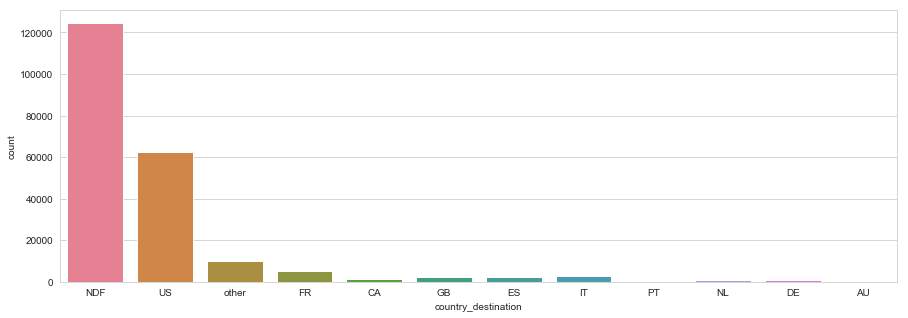

In [27]:
# country_destination

airbnb_df['booked'] = (airbnb_df['country_destination'] != 'NDF').astype(int)
# test_df['booked']   = (test_df['country_destination'] != 'NDF').astype(int)

# Plot the frequency for every country_destination value
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=airbnb_df, palette="husl", ax=axis1)

In [28]:
for i in range(len(joined_df['age_range'])):
    joined_df['age_range'][i] = str(joined_df['age_range'][i]).replace(',','')

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [33]:
joined_df

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active,train_test
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255,train
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809,train
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247,train
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129,train
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105,train
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,osr2jwljor,en,Web,0,basic,20100101215619,train
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,20100102012558,train
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,en,Web,0,basic,20100103191905,train
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,en,Web,0,basic,20100104004211,train
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,6uh8zyj2gn,en,Web,0,basic,20100104023758,train


In [ ]:
joined_df.to_csv('./data/airbnb_data2.csv')

In [ ]:
len(joined_df["first_affiliate_tracked"])